# BERT Model Testing

#### Ross Willett

In this notebook, the trained fraud email identifier built on the BERT transformer will be loaded and evaluated in terms of performance.

## Preparing the Data Set

In order to test the model, the data set will have to be appropriately separated.

In [1]:
import pandas as pd
import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt

# Model selection libraries
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Import Tensor Flow and keras
import tensorflow as tf
from tensorflow import keras

# Import Tensor Flow Hub and Tensor Flow Text (Required libraries for the pre-trained BERT Model)
import tensorflow_hub as hub
import tensorflow_text

2023-04-03 21:46:40.082935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [122]:
# Configure Pandas to show all columns / rows
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
# Set column max width larger
pd.set_option('display.max_colwidth', 1000)

In [9]:
# Load data from phishing email csv
email_df = pd.read_csv('./data/fraud_all_data_clean_4.csv')

In [10]:
# Separate the features into a separate data frame
X = email_df.drop(columns=['fraud'])
# Separate the target into a separate data frame
y = email_df.loc[:, ['fraud']]

In [11]:
# Split the data set into a remainder and test set
X_remainder, X_test, y_remainder, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=1337,
    test_size=0.2,
)
# Reset the indices of the data frames so index counts have the same start
X_remainder.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_remainder.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Loading and Testing the Model

Now that the data has been appropriately separated, the model can now be loaded and used to predict the classification of the test data.

In [107]:
# Load the saved model into Keras
loaded_model = keras.models.load_model(
    './models/bert_model_20_relu_sig.h5',
    custom_objects={'KerasLayer':hub.KerasLayer},
    compile=False,
)

In [108]:
# Add the compilation parameters for the model (Note this must be done since compile has been set to False)
loaded_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Recall()]
)

In [109]:
# Get the model prediction probabilities for the test content
y_test_pred = loaded_model.predict(X_test['content'])

78/78 [==============================] - 333s 4s/step


In [112]:
# Binarize the predictions at a threshold of 50% positive
y_test_bin_pred = np.where(y_test_pred >= 0.4, 1, 0)

In [113]:
# Check the accuracy score of the model
accuracy_score(y_test['fraud'].values, y_test_bin_pred.flatten())

0.9673518742442564

Using a threshold of 40% to indicate if an email is fraudulent or not results in a test accuracy of 96.7% for the BERT model. This is slightly lower than the test accuracy of the best tuned logistic regression model which is 97.3%. Despite the slightly lower accuracy I expect that the BERT model would be better for fraudulent email identification due to the fact it is not as reliant upon specific words and can better identify the context of words. The performance of the BERT model will be further examined by looking at its confusion matrix and the types of emails it incorrectly identifies.

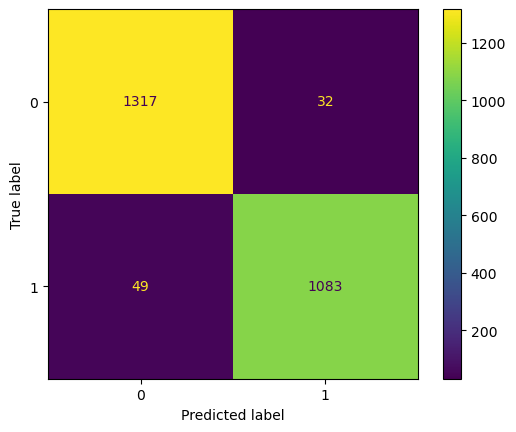

In [114]:
# Initialize the confusion matrix for the model's results
conf_matrix = confusion_matrix(y_test, y_test_bin_pred)
# Initialize the display of the confusion matrix for the model results
conf_disp = ConfusionMatrixDisplay(conf_matrix)
# Plot the confusion matrix
conf_disp.plot()
plt.show()

In [115]:
# Calculate the recall of the model
recall = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1]) * 100
# Calculate the precision of the model
precision = conf_matrix[1][1] / (conf_matrix[0][1] + conf_matrix[1][1]) * 100
# Print the precision and recall of the model
print(f'Recall: {recall}%')
print(f'Precision: {precision}%')

Recall: 95.6713780918728%
Precision: 97.13004484304932%


As demonstrated by the confusion matrix above, the recall of the model is 96% and precision is 97%. Without rounding, these numbers are slightly lower than the result of the best logistic regression model. Next, the incorrect categorizations of the model will be examined.

In [125]:
# Get the X values where the predicted value does not equal the test value
wrong_pred = X_test[y_test_bin_pred.flatten() != y_test['fraud']]

In [126]:
# Get the Y values where the predicted value does not equal the test value
wrong_pred_y = y_test[y_test_bin_pred.flatten() != y_test['fraud']]

In [127]:
# Concatinate the data frames with wrong X and Y predictions
wrong_pred = pd.concat([wrong_pred, wrong_pred_y], axis=1)

In [128]:
# Check the false negative predictions
wrong_pred[wrong_pred['fraud'] == 1]

,content,unsecure_link_count,secure_link_count,numbers_count,word_count,fraud
35,Hi for LESS struggle going on apparently they are the bound man to A complete corruption of history,1,0,1,18,1
207,You may or may not have of me however been marketing on the for over now and have done extremely well for myself I made over million in just a couple of of my final year of marketing which was a period when I scaled down due to my health During this time on the I many and huge successful down and of highly active In the end all I had to do to earn was send a few to my targeted and watch the viral action spread across of people on the Web Each one made me money Consider me as one of those illusive top that you hear about but never have had the luck of into your own down line I am one of the successful mystery that many of the biggest enrol into their own top tier to rapidly populate other with a bang I have also been engaged to create and deploy aggressive marketing to fill lower for some of the that you may be involved with right now too I have been involved at the top of many of the network and other business and have unimaginable over and ongoing profit For the last I have always...,0,0,21,543,1
229,Content transfer printable sent this message to Your registered name is included to show this message from Learn More click to User Agreement and Privacy Policy Dear writing to let you know that the User Agreement and Privacy Policy have been effective immediately for as of and effective for current User Agreement click Privacy Policy click The and dispute resolution you originally agreed to have not in any substantive way The User Agreement been however to cover new such as in the collection of overdue seller and to better meet the needs of our growing user community The new Privacy Policy like the old one the broad of information we collect from you based on your on the site and public data It also now specifically out the fact that does not sell your personal information for marketing and you to a page where you can select how you wish to be by If you would like to receive advance notice of and other be sure to select and event in your Notification If you accept the new User Agr...,7,0,49,606,1
345,committee representative whose name below We wait in anticipation of your operation Yours faithfully Ben DEPARTMENT OF AND OF SOUTH See their hear their laughter with Messenger messenger za,1,0,0,29,1
472,Please respond promptly to ensure your complete professional information is taken into consideration CONFIRM YOUR NOMINATION TODAY are selected based upon one current position and with information from reputable executive and professional Upon final confirmation you will be listed among over million accomplished in the Who Who registry The biographical data in Professional Who Who comes from the most authoritative available the themselves Inclusion in a Who Who publication as an endorsement of your and can significantly enhance your credibility and visibility There is no cost or obligation to be included in Professional Who Who CONFIRM YOUR NOMINATION TODAY,0,0,2,99,1
504,FROM THE DESK PROFESSOR GOVERNOR CENTRAL BANK OF STRONG,0,0,0,9,1
506,is this Tue yahoo ca wrote FROM PHON,0,0,11,8,1
595,Sun Oil Company Trusty Japan about index CASHIER am President of Japan Sun Japan Sun Oil Company is of the world renown in Japan and and are and marketing not only high but also petroleum and We specialized in the Refrigeration Rubber Process metalworking Industrial Automotive We are searching for who can help a medium of getting to our in and other nearby as well through you to us in Entering into a new era demand for continuous improvement and far beyond what was and just ago corporate are for perfection knowing all too well be yet another challenge With all the that unfold before us the difficulty out into the unknown preparation experience creativity and motivation We Japan Company take on the challenge and look expansion of our with pleasure You h

Looking at the messages the model identified as false negatives, there appears to be two prominent patterns. The first pattern is that the model does not properly flag fraud emails which tend to be lengthy where the sender pretends to be from an obscure organization or government institution. The other type of fraud emails incorrectly identified are those that tend to be short with no strong indicating words and a link for the user to follow. It is possible the length emails could be properly identified by a larger BERT model with more training, but it is unlikely the short emails could be identified without additional code built to feed this information along with the BERT model into a new model.

In [124]:
# Check the false positive predictions
wrong_pred[wrong_pred['fraud'] == 0]

,content,unsecure_link_count,secure_link_count,numbers_count,word_count,fraud
18,As list administrator your authorization is for the following list posting List taint From Subject humour Friendship to share Reason Post by non member to a only list At your convenience visit taint mailman to approve or deny the request,1,0,0,40,0
112,Madame Secretary Forgive the but I just to thank you and President for so graciously opening your home and to join in It was a truly wonderful evening Safe Rob,0,0,1,30,0
266,The Public Library Board the library on city of does not a bank loan of up to million and property tax receipts are,0,0,3,23,0
275,desk is working this issue on your behalf They will be in touch with the sender of the letter The letter you to enter into a bilateral agreement with in order to rectify a Locally in personal tax predicament I happy to call too if you like,0,0,4,47,0
382,You are this because you up to receive one of our free If you would prefer not to receive of this type please by following the at the bottom of this message Dear Investor Thank you again for our free special report The One Stock that Wall Street BUZZING We The Motley Fool in with the idea that like you deserved better Better than Wall Streets all too often research Better than who speak in secret them to hedge or spin any recommendation and better than what for full financial disclosure in big business today Given a level field we believe that regular like us and you can do quite well in the stock market Why put trust in information from when you could count on your own and potentially blow the away More than two million people visit our Fool web site each month We spend a great deal of time at Fool people HOW to invest but not so much about WHERE to invest And thats why we the Motley Fool Stock Advisor You are cordially to join us as a Charter Subscriber to Motley Fool Stock Advis...,4,0,15,607,0
418,was lovely to see you last night and sorry to bother Booth information in this and all are private and confidential and may be privileged is intended for the exclusive use of the recipient individual or If you are not the you are hereby notified that the content or to this communication may not be disclosed or distributed without our express permission and we would be grateful if you would then advise the of the error in delivery by to this message and then delete it from your system Thank you Virus Warning Although this and any are to be free from which your computer it may contain such While the sender taken every precaution to this risk and will not accept liability for any loss or damage as a result of which you sustain in any their receipt or opening You should carry out your own virus before opening the attachment This message been by,0,0,10,156,0
528,print attachment,0,0,0,2,0
618,be careful when this one Also that really cute thing that do of leaving their panties on one leg while making love Dare I ask what a girl is Yahoo Sponsor Free Join Now us click yahoo To from this group send an to Your use of Yahoo is subject to yahoo,2,0,4,52,0
724,state with this condolence cable for president He brother after a long illness Dear President Sincerely yours,0,0,4,17,0
749,state good internal memo internal strife as usual distribute as you determine,0,0,6,12,0


Examining the messages the model falsely identified as fraud reveals several commonalities. The first of these is that many of the messages falsely flagged typical relate to governments or finances. This makes sense since many fraud emails relate to these subjects. In addition to this, some messages which relate to downloading files or opening links have also been falsely flagged. This also makes sense since fraud emails tend to encourage this type of activity to trick victims into providing sensitive information or download viruses. It may be difficult to train a model to differentiate these types of emails from truly fraudulent ones without incorporating information about the sender, but it is possible with more data and training that this could be improved.

In [133]:
loaded_model.predict([
    '''
    

    '''
])

1/1 [==============================] - 0s 265ms/step


array([[0.21815123]], dtype=float32)

## Conclusion

Despite the fact that the BERT model has slightly worse performance than the best tuned linear regression model, the BERT model is still the model that is recommended for use as a fraud email identifier. This is largely due to the fact that it is much more generally applicable with its use of word embeddings. This is especially important since criminals who use these fraud schemes constantly change their strategies and if they become aware of specific words causing their emails to be flagged as fraud, they will simply stop using those words. The other advantage the BERT model has is the ability for it to distinguish the context of a word, thus just because a certain word appears, the model will not automatically identify the email as fraud. Thus, this BERT model represents a good start for a model that could be used for classifying an email as fraud or not, solely based on its text content.